In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysfmov as sfmov
import FLife
from tqdm import tqdm
import cv2

In [2]:
filename = './data/rec.sfmov'
fs = 400
dt = 1 / fs

data = sfmov.get_data(filename)
km = 1.2 * 10**(-8) 
stress = 10 * (data / km ) * 10**-6 # stress in MPa

location = 39,79,3,3 #vert mode area 
f = 55 # [54, 56] # HZ

In [21]:
class ThermalData():
        
    def __init__(self, x, dt):
        
        self.x = x
        self.dt = dt
    
    def _find_nearest(self, array, value):
        
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        
        return array[idx], idx
    
    def _pixel_selection(event):
        
        global ix, iy
        ix, iy = event.xdata, event.ydata
        self.pos.append((ix, iy))
        
        if len(self.pos) == 2:
            fig.canvas.mpl_disconnect(self.cid)
            plt.close(fig)
            
        return self.pos
    
    def nfi(self, location = None, high_pass = 5):
        
        N = self.x.shape[0]
        ds = self.x - self.x[0,:,:]
        self.pos = []
        
        if location is None:
            
            fig = plt.figure()
            ax = fig.add_subplot(111)
            ax.imshow(self.x[0,:,:])
            self.cid = fig.canvas.mpl_connect('button_press_event', self._pixel_selection)
            print(self.pos)
            #(x, y, w, h) = (self.pos[0][0] - 2, self.pos[0][1] - 2, 5, 5)
            (x, y, w, h) = (0,0,10,10)
        else:
            (x, y, w, h) = location    
        
        ds = ds[:, y:(y+h), x:(x+w)]
                
        fft = np.abs(np.fft.rfft(ds, N, axis = 0) * 2 / N)
        freq = np.fft.rfftfreq(N, dt)
        
        y_peak = np.max(fft[freq > high_pass])
        x_peak = freq[np.where(fft == y_peak)[0][0]]
        
        return x_peak

[]


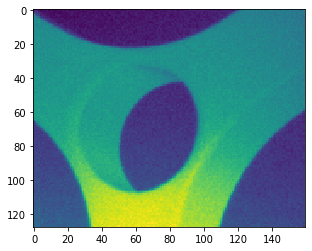

In [22]:
td = ThermalData(stress, dt)
x_peak = td.nfi()